# Load Packages

In [45]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Load Data Points (Do not modify the following block)

We have 15 number of data
Coefficients of the original polynomial
w0:-0.467  w1:-0.005  w2:0.281  w3:-0.054  


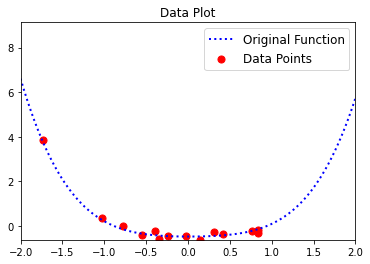

In [4]:
with open('training_data.npz', 'rb') as f:
    data = np.load(f)

    x_list = data['x_list']
    y_list = data['y_list']

    x_data = data['x_data']
    y_data = data['y_data']
    n_data = len(x_data)
    
    w = data['w']
    original_degree = data['order']
    
# Print information of original function.
print("=================================")
print("We have", n_data, "number of data")

print("=================================")
weight_info_string = ''
for d in range(original_degree):
    weight_info_string += 'w'+str(d)+':'+str(round(w[d],ndigits=3))+'  '
print("Coefficients of the original polynomial")
print(weight_info_string)
print("=================================")
    
plt.plot(x_list, y_list, 'b:', linewidth=2, label="Original Function")
plt.scatter(x_data, y_data, s=50, c='r', label="Data Points")
plt.xlim([np.min(x_list),np.max(x_list)])
plt.ylim([np.min(y_data),np.max(y_data)])
plt.legend(prop={'size': 12})
plt.title("Data Plot")
plt.show()

# Polynomial Regression (Programming Assignment)
### Variable Explanation (Do not change variable names)
- 'w' is true coefficients of the original polynomial function
- 'original_degree' is the order of the original polynomial function
- 'x_list' is a list of the points at $x$-axis
- 'y_list' is a list of function value $f(x)$ corresponding to 'x_list'. In other words, y_list = $f($x_list$)$
- 'x_data' is an input data
- 'y_data' is an output data
- 'n_data' is the number of data points

### Our goal is to estimate 'w' from data points, 'x_data' and 'y_data'. Answer the following problems.

### 1. Compute a Vandermonde matrix when the degree of polynomial is $4$ (30pt)
- The variable 'degree' is the order of polynomial. In this problem, we set degree=$4$
- Use the variable 'A' for the Vandermonde matrix. Now, 'A' is initialized as a zero matrix whose elements are all zero. Fill in the element of the Vandermonde matrix by using power operator (\*\*), for loop, and np.concatenation.

In [5]:
degree = 4
b = np.array([w[0],w[1]*x_list[0],w[2]*x_list[0]**2,w[3]*x_list[0]**3,w[4]+x_list[0]**4])
for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14]:
    a = np.array([w[0],w[1]*x_list[i],w[2]*x_list[i]**2,w[3]*x_list[i]**3,w[4]+x_list[i]**4])
    b = np.concatenate((b,a), axis=0)
    i = i+1
    if i ==n_data:
        continue
A = b.reshape((n_data,degree+1))

### Print results (do not modify the following block)

In [6]:
print(A)

[[-4.67292709e-01  1.08200313e-02  1.12565686e+00  4.29130779e-01
   1.63444436e+01]
 [-4.67292709e-01  1.06014449e-02  1.08063518e+00  4.03644728e-01
   1.50901690e+01]
 [-4.67292709e-01  1.03828584e-02  1.03653231e+00  3.79188273e-01
   1.39111250e+01]
 [-4.67292709e-01  1.01642719e-02  9.93348247e-01  3.55740185e-01
   1.28042415e+01]
 [-4.67292709e-01  9.94568538e-03  9.51082996e-01  3.33279237e-01
   1.17665124e+01]
 [-4.67292709e-01  9.72709888e-03  9.09736555e-01  3.11784199e-01
   1.07949956e+01]
 [-4.67292709e-01  9.50851239e-03  8.69308923e-01  2.91233842e-01
   9.88681277e+00]
 [-4.67292709e-01  9.28992590e-03  8.29800102e-01  2.71606937e-01
   9.03914970e+00]
 [-4.67292709e-01  9.07133941e-03  7.91210090e-01  2.52882257e-01
   8.24925610e+00]
 [-4.67292709e-01  8.85275292e-03  7.53538888e-01  2.35038571e-01
   7.51444564e+00]
 [-4.67292709e-01  8.63416643e-03  7.16786496e-01  2.18054651e-01
   6.83209594e+00]
 [-4.67292709e-01  8.41557993e-03  6.80952914e-01  2.01909269e-01

### 2. Compute the coefficients of polynomial regression using a $4$ degree polynomial  (40pt)
- Use the variable 'degree' and the Vandermonde matrix 'A' in Problem 1.
- The variable 'w_est' is the coefficients of polynomial regression. Now, 'w_est' is initialized as a zero vector. Compute the 'w_est' from 'A' and 'y'
- The variable 'y_est' is an estimated function value corresponding to the input points 'x_list'. Now, it is a zero list and fill the list by computing the estimated function values. In other words, y_est = $\hat{f}($x_list$)$

In [54]:
c = np.matmul(np.linalg.inv(np.matmul(A.T, A)), A.T) 
for i in [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]:
    y = y_list[i]
w_est = c*y
for i in [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]:
    x = x_list[i]
y_est = w_est*x

### Print results (do not modify the following block)

ValueError: x and y must have same first dimension, but have shapes (1,) and (5, 15)

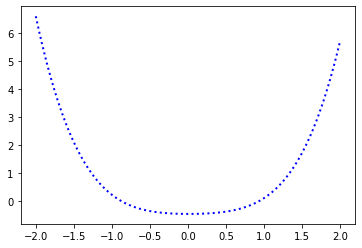

In [70]:
plt.plot(x_list, y_list, 'b:', linewidth=2, label="Original Function")
plt.plot(x_list[i], y_est, 'm-', linewidth=2, label="Polynomial Regression (d={})".format(degree))
plt.scatter(x_data, y_data, s=50, c='r', label="Data Points")
plt.xlim([np.min(x_list),np.max(x_list)])
plt.ylim([np.min(y_data),np.max(y_data)])
plt.legend(prop={'size': 12})
plt.title("Data Plot")
plt.show()

### 3. Compute the polynomial regression with $1$ degree polynomials (15pt)
- Repeat Problem 1 and Problem 2 with degree $1$.
- Use the following variables.
> degree1, A1, w_est1, y_est1

In [ ]:
degree1 = 1
A1 = np.zeros((n_data, degree1+1)) 
w_est1 = np.zeros((degree1+1,1))
y_est1 = np.zeros_like(x_list)

### Print results (do not modify the following block)

In [ ]:
plt.plot(x_list, y_list, 'b:', linewidth=2, label="Original Function")
plt.plot(x_list, y_est1, 'g-', linewidth=2, label="Polynomial Regression (d={})".format(degree1))
plt.scatter(x_data, y_data, s=50, c='r', label="Data Points")
plt.xlim([np.min(x_list),np.max(x_list)])
plt.ylim([np.min(y_data),np.max(y_data)])
plt.legend(prop={'size': 12})
plt.title("Data Plot")
plt.show()

### 4. Compute the polynomial regression with $10$ degree polynomials (15pt)
- Repeat Problem 1 and Problem 2 with degree $10$.
- Use the following variables.
> degree2, A2, w_est2, y_est2

In [ ]:
degree2 = 1
A2 = np.zeros((n_data, degree2+1))
w_est2 = np.zeros((degree2+1,1))
y_est2 = np.zeros_like(x_list)

### Print results (do not modify the following block)

In [ ]:
plt.plot(x_list, y_list, 'b:', linewidth=2, label="Original Function")
plt.plot(x_list, y_est2, 'c-', linewidth=2, label="Polynomial Regression (d={})".format(degree2))
plt.scatter(x_data, y_data, s=50, c='r', label="Data Points")
plt.xlim([np.min(x_list),np.max(x_list)])
plt.ylim([np.min(y_data),np.max(y_data)])
plt.legend(prop={'size': 12})
plt.title("Data Plot")
plt.show()

### 5. [Challenging Problem] Explain the effect of degree (20pt)
- By solving the above problems, we can observe the behaviors of polynomial regression with different degrees (1, 4, 10)
- Explain pros and cons of high degree polynomial
- Explain pros and cons of low degree polynomial
- What is this phenomenon called in machine learning?

### The following figure shows all regression results with different degrees.

In [ ]:
plt.plot(x_list, y_list, 'b:', linewidth=2, label="Original Function")
plt.plot(x_list, y_est, 'm-', linewidth=2, label="Polynomial Regression (d={})".format(1))
plt.plot(x_list, y_est1, 'g-', linewidth=2, label="Polynomial Regression (d={})".format(4))
plt.plot(x_list, y_est2, 'c-', linewidth=2, label="Polynomial Regression (d={})".format(10))
plt.scatter(x_data, y_data, s=50, c='r', label="Data Points")
plt.xlim([np.min(x_list),np.max(x_list)])
plt.ylim([np.min(y_data),np.max(y_data)])
plt.legend(prop={'size': 12})
plt.title("Data Plot")
plt.show()

Write your answer!!!